In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as  hub
import tensorflow_datasets as tfds
import  numpy as np

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

Using TensorFlow backend.


In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
Classifier = "https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/4"
image_res = 299
feature_extractor = hub.KerasLayer(Classifier , input_shape=(image_res, image_res, 3))
feature_extractor.trainable = False

In [5]:
model = tf.keras.Sequential([feature_extractor,
                             layers.Dense(7),
                             layers.Activation(tf.nn.softmax)
                            ])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              55875273  
_________________________________________________________________
dense (Dense)                (None, 7)                 7014      
Total params: 55,882,287
Trainable params: 7,014
Non-trainable params: 55,875,273
_________________________________________________________________


In [7]:
train_image_generator      = ImageDataGenerator(rescale=1./255,
                                                rotation_range=30,
                                                zoom_range=0.2,
                                                horizontal_flip=True,
                                                width_shift_range=0.15,
                                                height_shift_range=0.15
                                               )  
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator       = ImageDataGenerator(rescale=1./255)

In [8]:
IMG_SHAPE = 299

In [9]:
train_dir = '../data/faces/train/'
val_dir = '../data/faces/val/'

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=100,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='sparse')

Found 155 images belonging to 7 classes.


In [11]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=20,
                                                              directory=val_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='sparse')

Found 35 images belonging to 7 classes.


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              55875273  
_________________________________________________________________
dense (Dense)                (None, 7)                 7014      
Total params: 55,882,287
Trainable params: 7,014
Non-trainable params: 55,875,273
_________________________________________________________________


In [14]:
EPOCHS = 60
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(155 / float(100))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(35 / float(20)))
)

Train for 2 steps, validate for 2 steps
Epoch 1/60
2/2 [==============================] - 93s 47s/step - loss: 2.8746 - accuracy: 0.1806 - val_loss: 2.3899 - val_accuracy: 0.2000
Epoch 2/60
2/2 [==============================] - 58s 29s/step - loss: 2.0429 - accuracy: 0.2065 - val_loss: 1.8811 - val_accuracy: 0.2571
Epoch 3/60
2/2 [==============================] - 59s 30s/step - loss: 1.9560 - accuracy: 0.2839 - val_loss: 1.5913 - val_accuracy: 0.2857
Epoch 4/60
2/2 [==============================] - 56s 28s/step - loss: 1.8825 - accuracy: 0.2645 - val_loss: 1.3789 - val_accuracy: 0.4286
Epoch 5/60
2/2 [==============================] - 57s 28s/step - loss: 1.7287 - accuracy: 0.3097 - val_loss: 1.2271 - val_accuracy: 0.5429
Epoch 6/60
2/2 [==============================] - 58s 29s/step - loss: 1.6261 - accuracy: 0.3484 - val_loss: 1.0909 - val_accuracy: 0.6857
Epoch 7/60
2/2 [==============================] - 56s 28s/step - loss: 1.4544 - accuracy: 0.4000 - val_loss: 0.9931 - val_accu

In [15]:
model.save('face-recogition.h5')

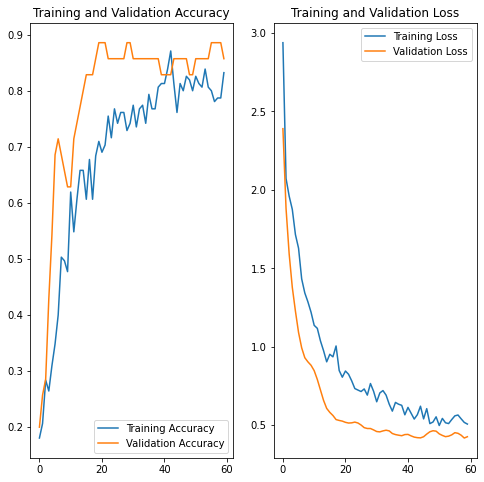

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./learning.png')
plt.show()

In [19]:
#model = load_model('keras.h5')
model = tf.keras.models.load_model('face-recogition.h5',custom_objects={'KerasLayer':hub.KerasLayer})
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              55875273  
_________________________________________________________________
dense (Dense)                (None, 7)                 7014      
Total params: 55,882,287
Trainable params: 7,014
Non-trainable params: 55,875,273
_________________________________________________________________


In [18]:
model = tf.keras.models.load_model('face-recogition-colab.h5',custom_objects={'KerasLayer':hub.KerasLayer})
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              55875273  
_________________________________________________________________
dense (Dense)                (None, 7)                 7014      
Total params: 55,882,287
Trainable params: 7,014
Non-trainable params: 55,875,273
_________________________________________________________________
